<a href="https://colab.research.google.com/github/pranit06/Deep_Learning/blob/main/DL_Exp1_30112020(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Aplhabets

## Importing Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [ ]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2020-12-02 05:22:20--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-02 05:22:20--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [ <=>                ]  28.22M  --.-KB/s    in 0.1s    

2020-12-02 05:22:20 (249 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-02 05:22:20--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.1

In [ ]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [ ]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

## Displaying data

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

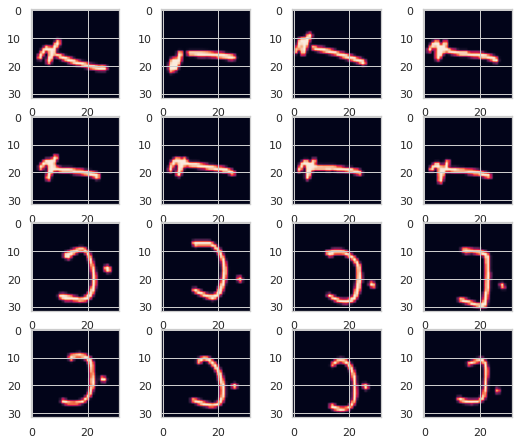

In [ ]:
display_image(train_data, 32, 16)

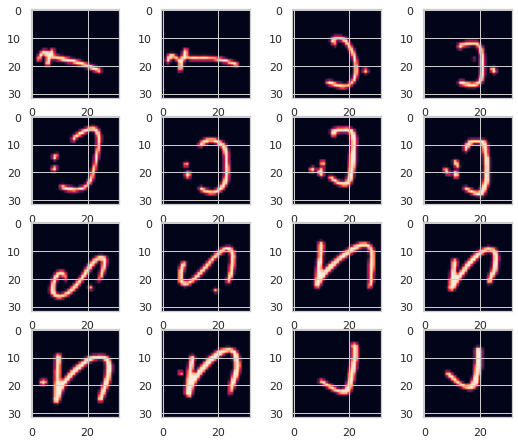

In [ ]:
display_image(test_data, 32, 16)

## Preprocessing

In [ ]:
train_label = to_categorical(train_label,28)

In [ ]:
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [ ]:
train_data.shape

(13440, 32, 32, 1)

## Building ANN

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
nn = models.Sequential()
nn.add(layers.Flatten(input_shape=(32,32,1)))
nn.add(layers.Dense(1024, activation="relu"))
nn.add(layers.Dense(512, activation="relu"))
nn.add(layers.Dense(256, activation="tanh"))
nn.add(layers.Dense(128, activation="relu"))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(28, activation="softmax"))

nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 28)               

## Using callbacks

In [ ]:
nn.compile(optimizer="adam",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(train_data,train_label, epochs=5000, batch_size = 100, validation_split=0.25, verbose=2, callbacks=[es, mc])

Epoch 1/5000

Epoch 00001: val_accuracy improved from -inf to 0.41220, saving model to best_model.h5
101/101 - 1s - loss: 2.3251 - accuracy: 0.2706 - val_loss: 1.8269 - val_accuracy: 0.4122
Epoch 2/5000

Epoch 00002: val_accuracy improved from 0.41220 to 0.52649, saving model to best_model.h5
101/101 - 1s - loss: 1.2264 - accuracy: 0.5678 - val_loss: 1.4572 - val_accuracy: 0.5265
Epoch 3/5000

Epoch 00003: val_accuracy improved from 0.52649 to 0.61845, saving model to best_model.h5
101/101 - 1s - loss: 0.7931 - accuracy: 0.7088 - val_loss: 1.1897 - val_accuracy: 0.6185
Epoch 4/5000

Epoch 00004: val_accuracy did not improve from 0.61845
101/101 - 0s - loss: 0.5286 - accuracy: 0.8048 - val_loss: 1.2875 - val_accuracy: 0.5973
Epoch 5/5000

Epoch 00005: val_accuracy improved from 0.61845 to 0.64167, saving model to best_model.h5
101/101 - 0s - loss: 0.3707 - accuracy: 0.8674 - val_loss: 1.2734 - val_accuracy: 0.6417
Epoch 6/5000

Epoch 00006: val_accuracy did not improve from 0.64167
101/

## Saving and loading model

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best_model.h5')

In [ ]:
y_test = to_categorical(test_label)

In [ ]:
_, test_acc = saved_model.evaluate(test_data, y_test, verbose=2)
print('Test: %.3f' % ( test_acc))

105/105 - 0s - loss: 2.2062 - accuracy: 0.7792
Test: 0.779


In [ ]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_label, predictions)

In [ ]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.7773809523809524


### Screenshot

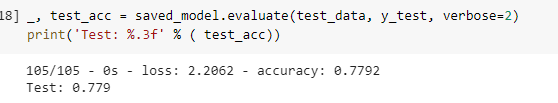

## Plots

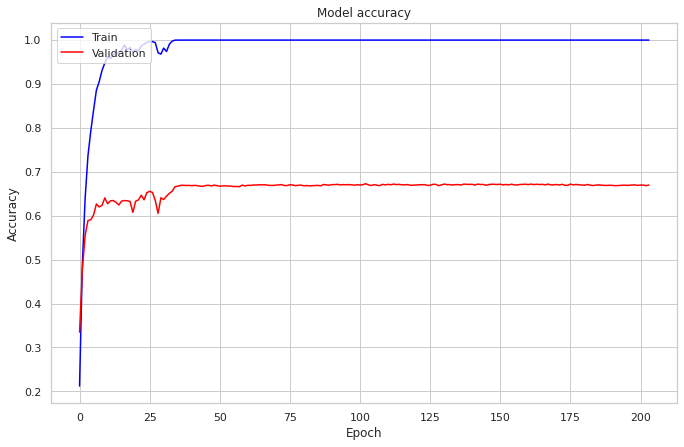

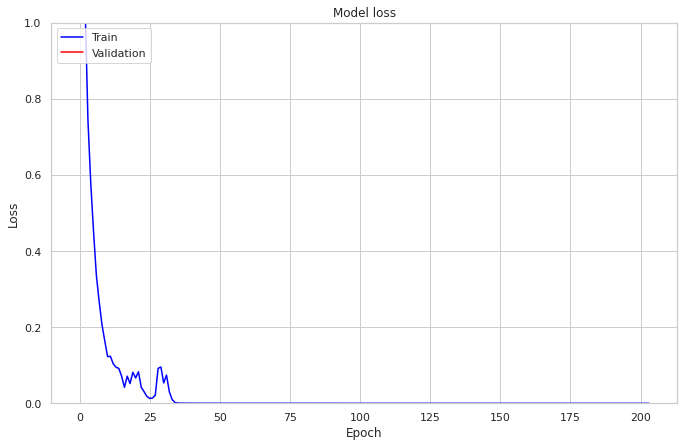

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)
predictions

array([ 0,  0,  1, ..., 26, 27, 27])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(test_label, predictions, average="macro"))
print('recall score - ', recall_score(test_label, predictions, average="macro"))  

precision score -  0.04243788412597058
recall score -  0.043965517241379315


# Flowers

## Loading Data

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-03 12:46:25--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-03 12:46:25--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [     <=>            ]   5.74M   374KB/s    in 18s     

2020-12-03 12:46:45 (319 KB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 13/13 [00:00<00:00, 213.22it/s]

13


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 426.33it/s]

39


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 394.73it/s]

65


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 389.41it/s]

91


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 384.52it/s]

117


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## Building ANN


In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
nn = models.Sequential()
nn.add(layers.Flatten(input_shape=(150,150,3)))
nn.add(layers.Dense(1024, activation="relu"))
nn.add(layers.Dense(512, activation="relu"))
nn.add(layers.Dense(128, activation="relu"))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(5, activation="softmax"))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              69121024  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 69,720,069
Trainable params: 69,720,069
Non-trainable params: 0
__________________________________________

## Using callbacks

In [ ]:
nn.compile(optimizer="adam",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 10, validation_split=0.20, verbose=2, callbacks=[es, mc])

Epoch 1/5000

Epoch 00001: val_accuracy improved from -inf to 0.22222, saving model to best_model.h5
7/7 - 3s - loss: 30.6449 - accuracy: 0.2754 - val_loss: 22.7384 - val_accuracy: 0.2222
Epoch 2/5000

Epoch 00002: val_accuracy improved from 0.22222 to 0.33333, saving model to best_model.h5
7/7 - 6s - loss: 12.3931 - accuracy: 0.2464 - val_loss: 5.1989 - val_accuracy: 0.3333
Epoch 3/5000

Epoch 00003: val_accuracy did not improve from 0.33333
7/7 - 0s - loss: 10.0526 - accuracy: 0.3043 - val_loss: 7.5506 - val_accuracy: 0.2778
Epoch 4/5000

Epoch 00004: val_accuracy did not improve from 0.33333
7/7 - 0s - loss: 4.2358 - accuracy: 0.3478 - val_loss: 6.7552 - val_accuracy: 0.3333
Epoch 5/5000

Epoch 00005: val_accuracy did not improve from 0.33333
7/7 - 0s - loss: 1.9038 - accuracy: 0.5362 - val_loss: 4.1003 - val_accuracy: 0.2778
Epoch 6/5000

Epoch 00006: val_accuracy did not improve from 0.33333
7/7 - 0s - loss: 1.1562 - accuracy: 0.6957 - val_loss: 3.8421 - val_accuracy: 0.1667
Epoch

In [ ]:
x_train.shape

(87, 150, 150, 3)

In [ ]:
x_test.shape

(30, 150, 150, 3)

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=2)
print('Test: %.3f' % ( test_acc))

1/1 - 0s - loss: 2.6815 - accuracy: 0.6000
Test: 0.600


## Screenshot

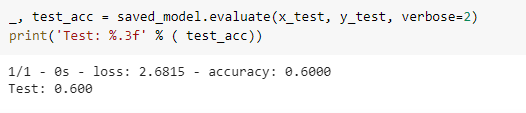

## Plots

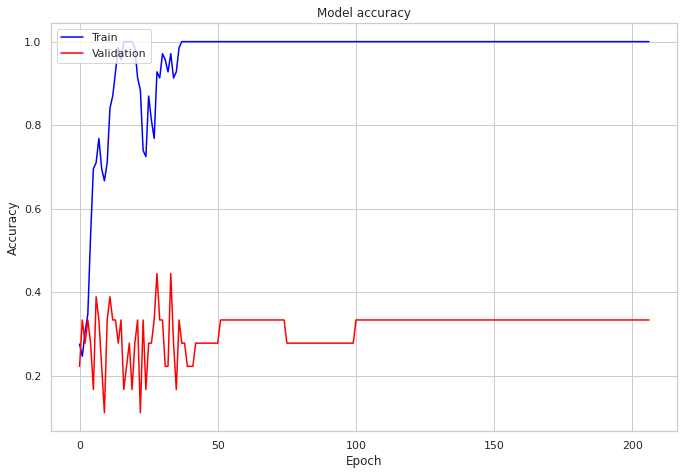

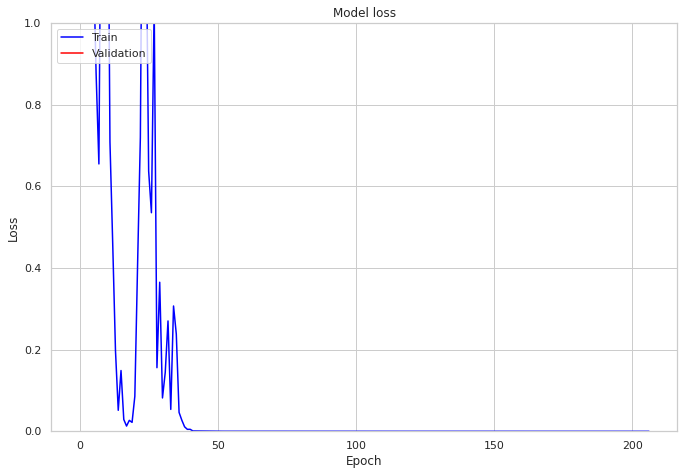

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Precision and Recall

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best_model.h5')

In [ ]:
predictions = model.predict(x_test)

In [ ]:
a = np.argmax( predictions ,axis=1)

In [ ]:
a

array([4, 1, 4, 3, 4, 4, 2, 2, 1, 4, 3, 1, 4, 2, 4, 4, 3, 4, 4, 4, 1, 4,
       1, 1, 4, 4, 1, 3, 3, 3])

In [ ]:
b = np.argmax( y_test ,axis=1)
b

array([3, 0, 3, 3, 0, 4, 4, 2, 1, 0, 3, 1, 2, 2, 1, 0, 3, 2, 4, 2, 4, 4,
       2, 0, 1, 4, 1, 1, 3, 1])

In [ ]:
cm = confusion_matrix(a,b)
cm

array([[0, 0, 0, 0, 0],
       [2, 3, 1, 0, 1],
       [0, 0, 2, 0, 1],
       [0, 2, 0, 4, 0],
       [3, 2, 3, 2, 4]])

In [ ]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.43333333333333335


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(a, b, average="macro"))
print('recall score - ', recall_score(a, b, average="macro"))

precision score -  0.419047619047619
recall score -  0.4095238095238095


## Saving and Loading model

In [ ]:
model.save('final_model2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_model2/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('final_model2')